In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import os

In [33]:
#Set working directory
os.chdir("c:\\Users\\ual-laptop\\Desktop\\Semester 1\\MIS 545\\Project")

In [34]:
#Read amazon dataset
amazon_sale = pd.read_excel('Amazon_Sale_Report.xlsx')

In [35]:
#Remover records where status is cancelled
amazon_sale = amazon_sale[amazon_sale['Status'] != 'Cancelled']

In [36]:
#Replace space with underscore in column names
amazon_sale.columns = amazon_sale.columns.str.replace(' ', '_')

In [37]:
#Drop all columns except Date and amount
data = amazon_sale[['Date','Amount']]

In [38]:
#Convert the date column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

C:\Users\ual-laptop\AppData\Local\Temp\ipykernel_19300\1453708669.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date'])


In [39]:
#Set the date column as index
data = data.set_index('Date')

In [49]:
#Group the amount by date
data = data.groupby('Date')['Amount'].sum().reset_index()


In [79]:
#Print the first 5 records
data.head()


,Amount
Date,
2022-03-31,94810.0
2022-04-01,779737.0
2022-04-02,811110.0
2022-04-03,925049.0
2022-04-04,813708.0


In [81]:
#Split the data before June 2022 as train and after June 2022 as test
train = data[data.index < '2022-06-01']
test = data[data.index >= '2022-06-01']

In [53]:
train

,Amount
Date,
2022-03-31,94810.0
2022-04-01,779737.0
2022-04-02,811110.0
2022-04-03,925049.0
2022-04-04,813708.0
...,...
2022-05-27,758736.0
2022-05-28,794933.0
2022-05-29,754772.0


In [54]:
test

,Amount
Date,
2022-06-01,849444.0
2022-06-02,815825.0
2022-06-03,673424.0
2022-06-04,818301.0
2022-06-05,902142.0
2022-06-06,877656.0
2022-06-07,883069.0
2022-06-08,860937.0
2022-06-09,868403.0


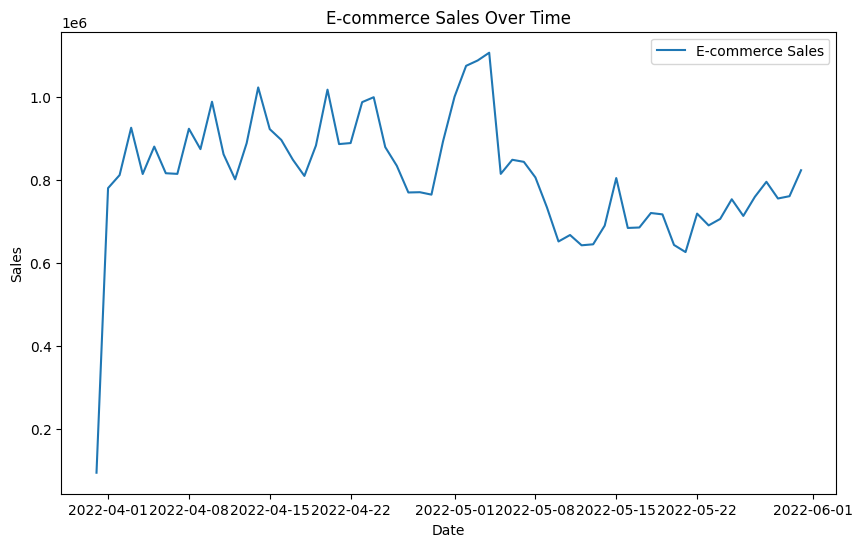

In [55]:
#Plot the train dataset
plt.figure(figsize=(10, 6))
plt.plot(train, label='E-commerce Sales')
plt.title('E-commerce Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [56]:
# Fit the model
model = ExponentialSmoothing(train, seasonal='add', seasonal_periods=2)
fit_model = model.fit()

c:\Users\ual-laptop\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\ual-laptop\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [71]:
# Set forecast periods 
forecast_periods = 30

In [72]:
# Predict the future values
predictions = fit_model.forecast(steps=forecast_periods)

In [73]:
predictions


2022-06-01    763796.224001
2022-06-02    796716.486760
2022-06-03    763796.224001
2022-06-04    796716.486760
2022-06-05    763796.224001
2022-06-06    796716.486760
2022-06-07    763796.224001
2022-06-08    796716.486760
2022-06-09    763796.224001
2022-06-10    796716.486760
2022-06-11    763796.224001
2022-06-12    796716.486760
2022-06-13    763796.224001
2022-06-14    796716.486760
2022-06-15    763796.224001
2022-06-16    796716.486760
2022-06-17    763796.224001
2022-06-18    796716.486760
2022-06-19    763796.224001
2022-06-20    796716.486760
2022-06-21    763796.224001
2022-06-22    796716.486760
2022-06-23    763796.224001
2022-06-24    796716.486760
2022-06-25    763796.224001
2022-06-26    796716.486760
2022-06-27    763796.224001
2022-06-28    796716.486760
2022-06-29    763796.224001
Freq: D, dtype: float64

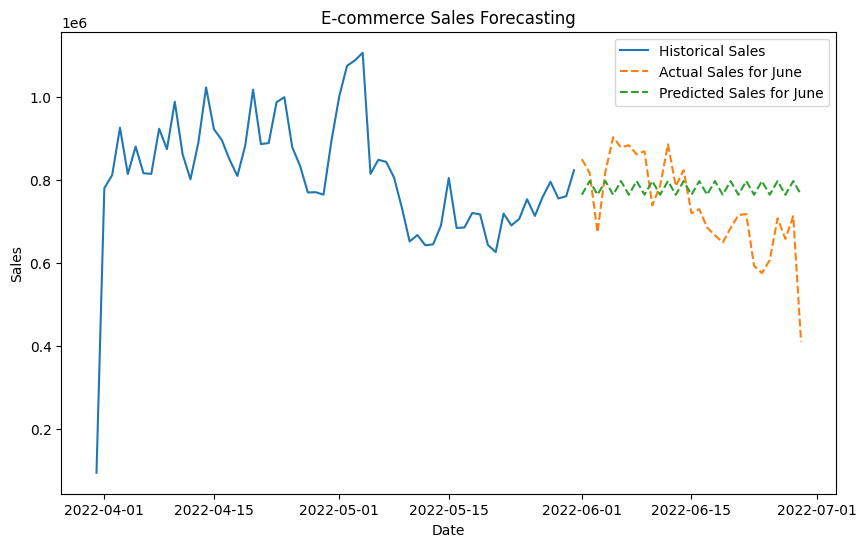

In [74]:
#Plot the train, test and predicted values
plt.figure(figsize=(10, 6))
plt.plot(train, label='Historical Sales')
plt.plot(test, label='Actual Sales for June', linestyle='dashed')
plt.plot(predictions.index, predictions, label='Predicted Sales for June', linestyle='dashed')
plt.title('E-commerce Sales Forecasting')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()